# Sample solutions

In [2]:
!pip install memory-profiler


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 544.7 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 722.1 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 958.4 kB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%matplotlib inline
%load_ext memory_profiler
import numpy as np
from scipy import sparse
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib as mpl
from yellowbrick.style import rcmod
from scipy.stats import spearmanr
from memory_profiler import profile

In [3]:
# Yellowbrick changes the plotting settings, reset to default here
rcmod.reset_orig()

# Problem 1

1. Load the data

In [12]:
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p1/X.npy")
y = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p1/y.npy")

In [13]:
# 511 cells, 45768 genes
print(X.shape)

(511, 45768)


In [14]:
# Largest entry of first column
np.max(X[:,0])

11.941397591320595

2. Log transform

In [15]:
# Log 
X_log = np.log2(X + 1)

In [16]:
# Largest entry of first column
print(np.max(X_log[:,0]))

3.6939215228197613


3. Full PCA, raw vs transformed data

In [17]:
%%timeit -n 1 -r 1
%%memit -r 1
pca = PCA().fit(X)
pca_log = PCA().fit(X_log)

peak memory: 1683.54 MiB, increment: 588.94 MiB
5min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
z = pca_log.transform(X_log)

In [ ]:
## Load Data

labels = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p1/y.npy")

#Full PCA, raw vs transformed data
#pca = PCA(50).fit(X)
pca_log = PCA(50).fit(X_log)


In [20]:
labels = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p1/y.npy")

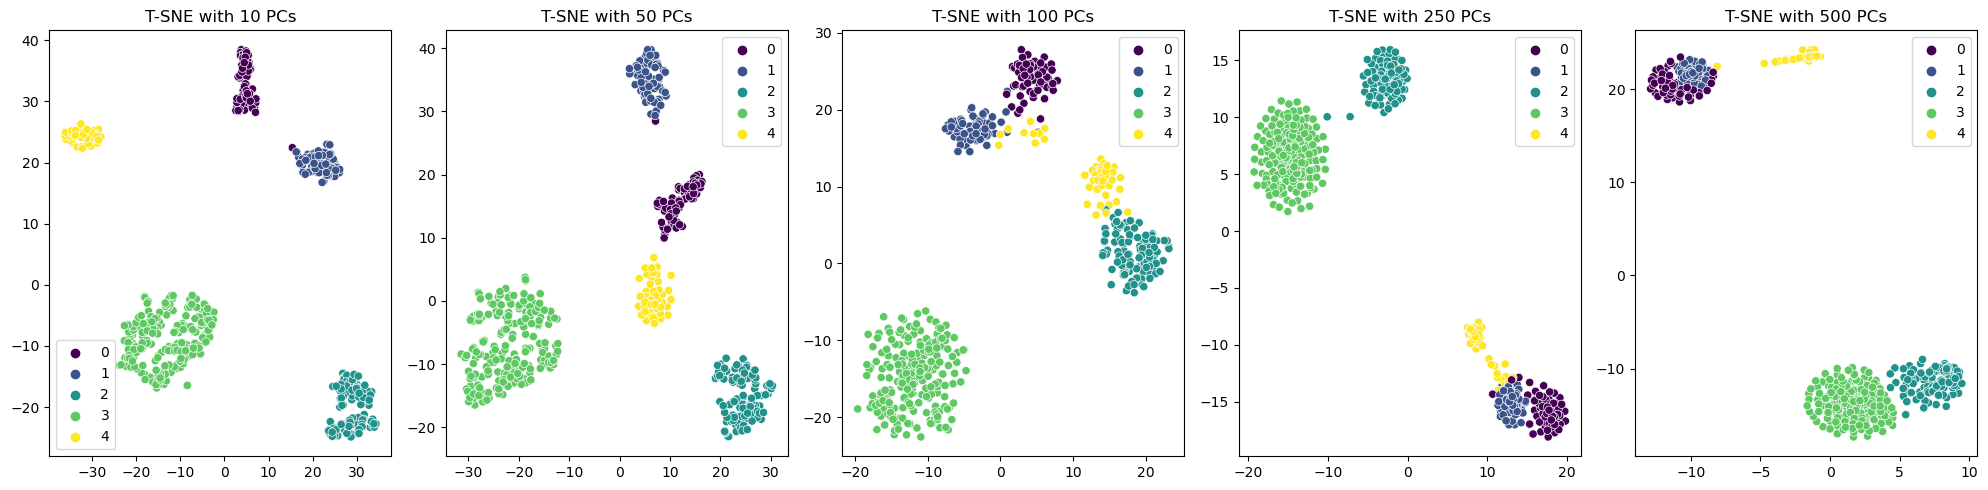

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your dataset and `labels` are the corresponding labels for the data points

def plot_tsne(data, labels, n_components_list):
    fig, axes = plt.subplots(1, len(n_components_list), figsize=(20, 5))
    for i, n_components in enumerate(n_components_list):
        pca = PCA(n_components=n_components)
        pca_data = pca.fit_transform(data)
        
        tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(pca_data)
        
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, ax=axes[i], palette='viridis')
        axes[i].set_title(f'T-SNE with {n_components} PCs')
    
    plt.tight_layout()
    plt.show()

# Example usage
n_components_list = [10, 50, 100, 250, 500]
plot_tsne(X_log, labels, n_components_list)


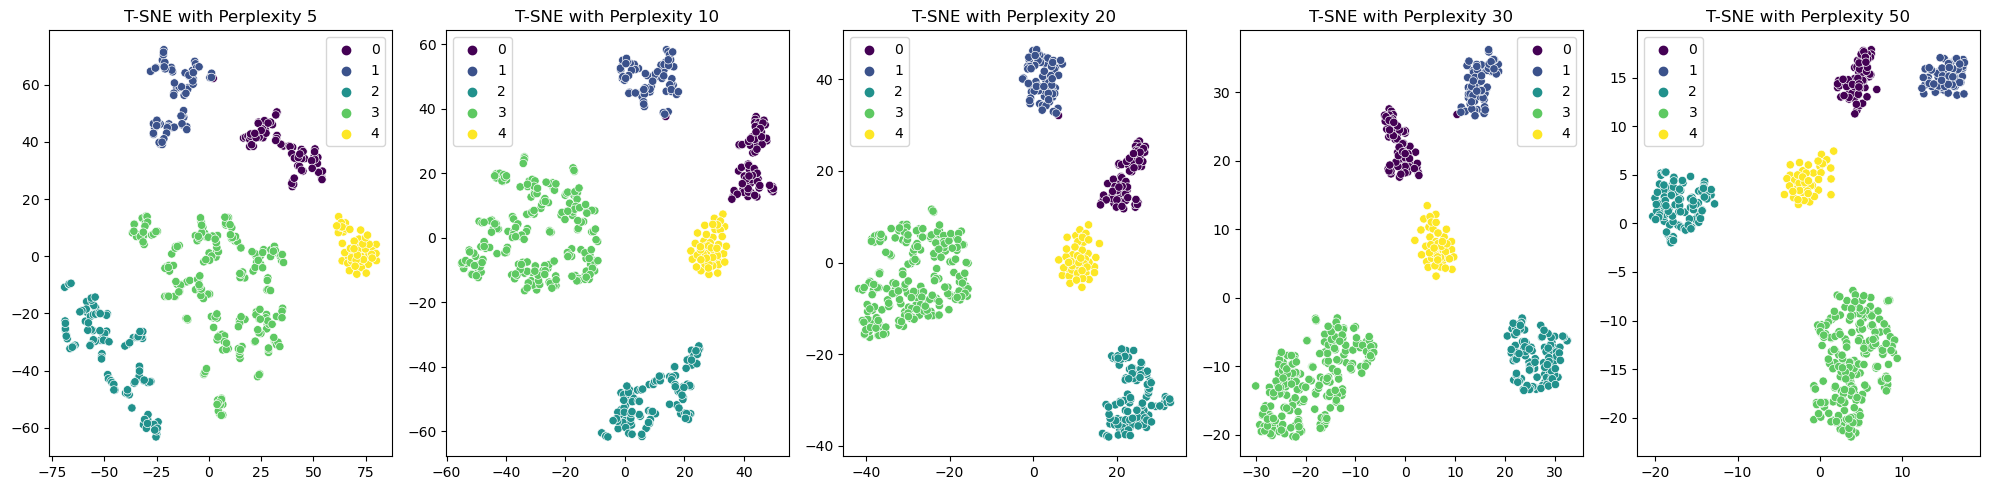

In [24]:
perplexities = [5, 10, 20, 30, 50]

def plot_tsne_perplexity(data, labels, perplexities):
    pca = PCA(n_components=50)
    pca_data = pca.fit_transform(data)
    
    fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 5))
    for i, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=200, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(pca_data)
        
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, ax=axes[i], palette='viridis')
        axes[i].set_title(f'T-SNE with Perplexity {perplexity}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_tsne_perplexity(X_log, labels, perplexities)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

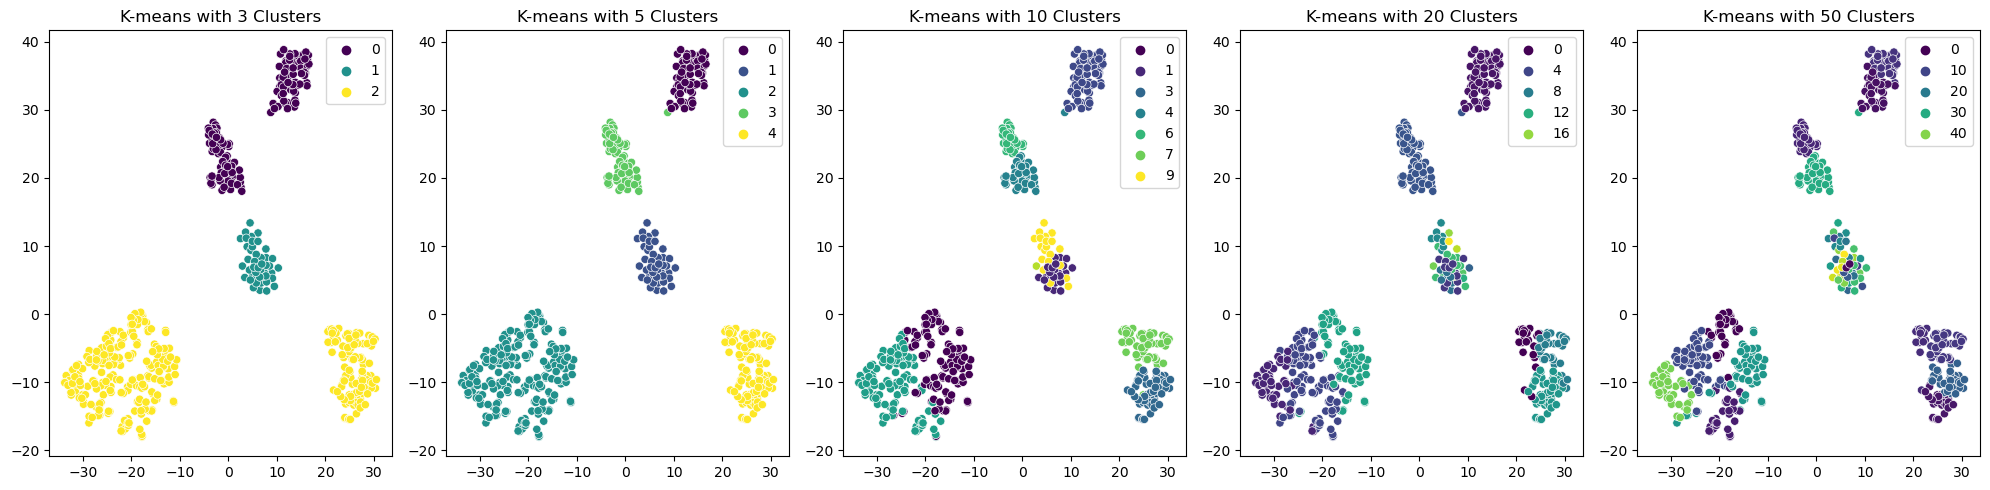

In [26]:
from sklearn.cluster import KMeans

n_clusters_list = [3, 5, 10, 20, 50 ]

def plot_kmeans_clusters(data, n_clusters_list):
    pca = PCA(n_components=50)
    pca_data = pca.fit_transform(data)
    
    fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(20, 5))
    for i, n_clusters in enumerate(n_clusters_list):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(pca_data)
        
        tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(pca_data)
        
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=clusters, ax=axes[i], palette='viridis')
        axes[i].set_title(f'K-means with {n_clusters} Clusters')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_kmeans_clusters(X_log, n_clusters_list)


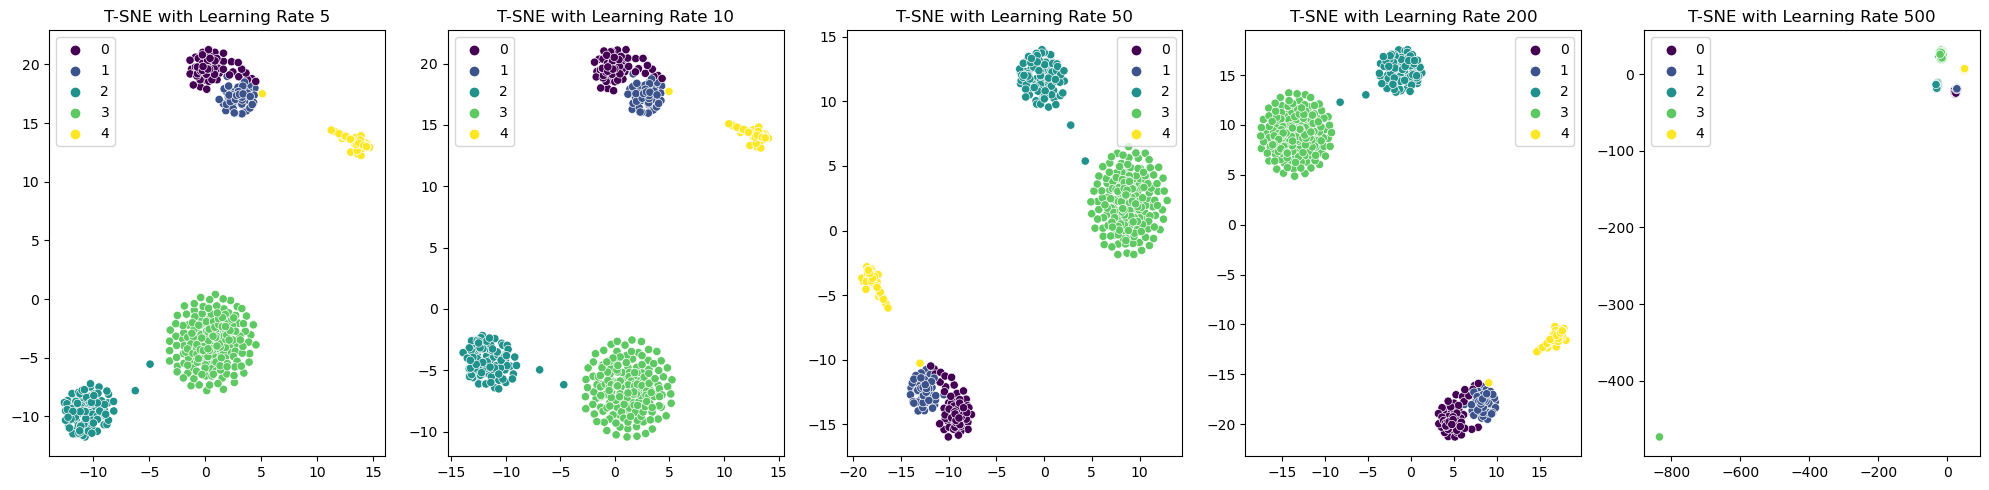

In [27]:
learning_rates = [5, 10,50, 200,500]

def plot_tsne_learning_rate(data, labels, learning_rates):
    fig, axes = plt.subplots(1, len(learning_rates), figsize=(20, 5))
    for i, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=30, learning_rate=learning_rate, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(data)
        
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, ax=axes[i], palette='viridis')
        axes[i].set_title(f'T-SNE with Learning Rate {learning_rate}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_tsne_learning_rate(X_log, labels, learning_rates)


In [18]:
# Percentage of variance explained by first component
print("First component raw:", pca.explained_variance_ratio_[0])
print("First component log:", pca_log.explained_variance_ratio_[0])

First component raw: 0.42779670983572665
First component log: 0.1388756487082617


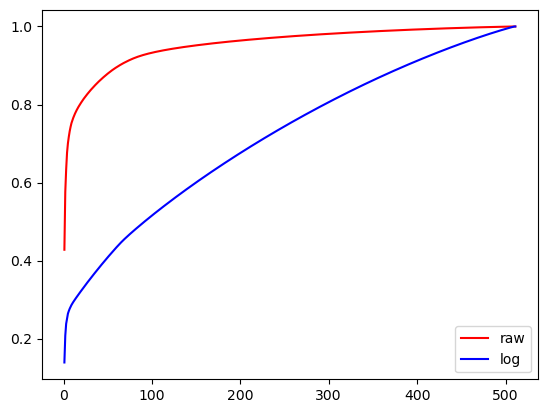

In [19]:
# Cumulative variance explained plots
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca.explained_variance_ratio_), color="red", label="raw")
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca_log.explained_variance_ratio_), color="blue", label="log")
plt.legend()
plt.show()

In [20]:
# 85% variance cutoffs
print("Raw:", np.where(np.cumsum(pca.explained_variance_ratio_) >= .85)[0][0] + 1)
print("Log:", np.where(np.cumsum(pca_log.explained_variance_ratio_) >= .85)[0][0] + 1)

Raw: 36
Log: 339


Remember that we want to find genes that can differentiate between cells, even if the genes are not expressed in many cells and/or have low levels of expression. For example, if a particular gene has $0$ expression for $80$ cells and $0.2$ expression for $20$ cells, that would contribute much less to the variance than a gene with $0$ expression for $50$ cells and $0.8$ expression for $50$ cells. While the latter gene might just differentiate between neuron vs non-neuron (for example),  the former gene might differentiate between specific cell types.  But the variances differ greatly and we don't want to make the conclusion that the latter gene is sufficient for explaining the variation between cells in the data.

4. Plotting without visualization techniques

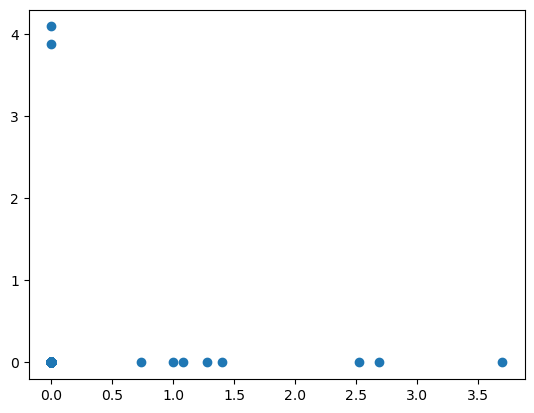

In [21]:
# Nothing informative!
plt.scatter(X_log[:,0],X_log[:,1])

5. PCA visualization

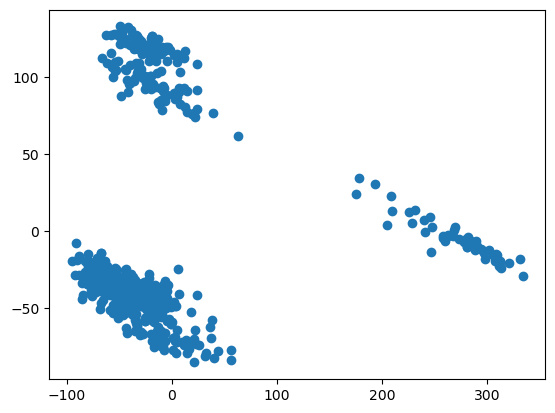

In [22]:
# Three visually distinct clusters. Could potentially argue for 4 or 5 as well, but these are not well-separated
z = pca_log.transform(X_log)
plt.scatter(z[:,0],z[:,1])

6. MDS (sklearn version is nonlinear)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


2110160835.5384502


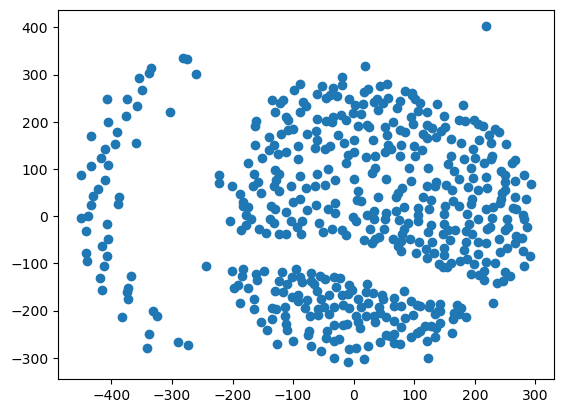

In [23]:
# Since there is randomization in the initial state, run this multiple times and use the result with the best objective function value.  (Also be aware that some initializations can give you suboptimal local minima for both MDS and T-SNE algorithms). 
#We still see 3 distinct clusters.  
mds_class=MDS(n_components=2)
mds=mds_class.fit_transform(X_log)
print(mds_class.stress_)
plt.scatter(mds[:,0],mds[:,1])

7. T-SNE

0.4836979806423187


Text(0.5, 1.0, 't-SNE plot')

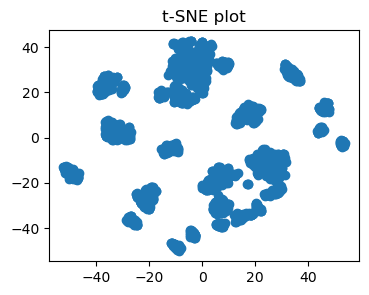

In [34]:
# Emergence of at least 5 clusters. 
# Since there is randomization in the initial state, run this multiple times and use the result with the best objective function value.  (Also be aware that some initializations can give you suboptimal local minima for both MDS and T-SNE algorithms).

z_tsne_class = TSNE(n_components=2,perplexity=40)
z_tsne=z_tsne_class.fit_transform(z[:,0:50])
print(z_tsne_class.kl_divergence_)

plt.figure(figsize=(4,3))
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("t-SNE plot")

8. K-Means: From the T-SNE plot (with the lowest KL-divergence), we can see the emergence of 5 clusters. 


In [38]:
# K-means with n=5, as decided from T-SNE plot above; 
# Run multiple times and explore settings to get the lowest inertia_, such aa:
# init='random', or random_state=0  
kmeans = KMeans(3, tol=1e-6) 
kmeans.fit(z[:,0:50])
print(kmeans.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


24741582.68339756


Text(0.5, 1.0, 'PCA plot colored with K-means clusters plot')

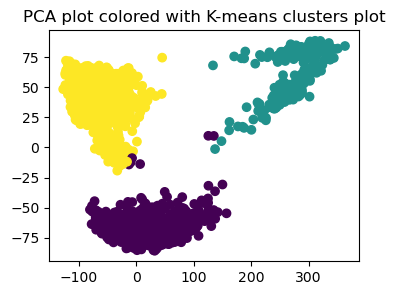

In [39]:
#PCA plot colored with K-means clusters

plt.figure(figsize=(4,3))
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)
plt.title("PCA plot colored with K-means clusters plot")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


2108354099.8051803


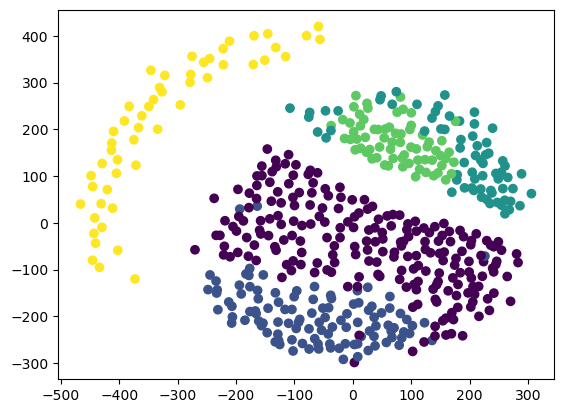

In [27]:
# MDS plot with 5 K-means clusters, on log-transformed data:
mds=mds_class.fit_transform(X_log)
print(mds_class.stress_)
plt.scatter(mds[:,0],mds[:,1],c=kmeans.labels_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


264578446.17860577


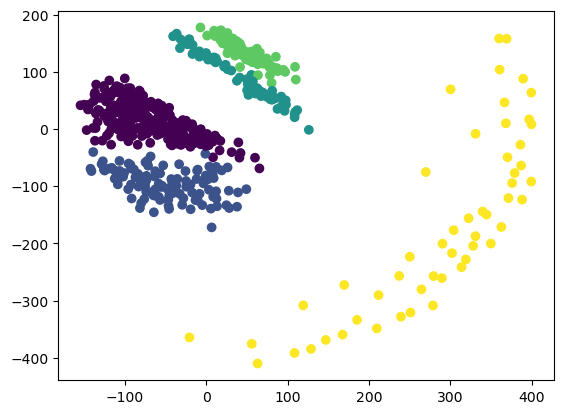

In [28]:
# Alternatively, MDS on first 50 PCS of log-transformed data
# colored with the 5 K-means clusters:
mds_class=MDS(n_components=2)
mds=mds_class.fit_transform(z[:,0:50])
print(mds_class.stress_)
plt.scatter(mds[:,0],mds[:,1],c=kmeans.labels_)

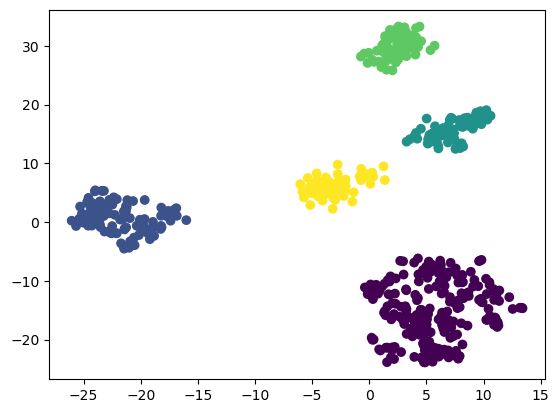

In [29]:
# T-SNE on first 50 PCS of log-transformed data,
# colored with 4 K-means clusters 

plt.scatter(z_tsne[:,0],z_tsne[:,1], c=kmeans.labels_)

9. Elbow method.

Num clusters 2 Inertia: 9520809.578746
Num clusters 3 Inertia: 7257882.201193228
Num clusters 4 Inertia: 6202929.841899466
Num clusters 5 Inertia: 5801585.180913827
Num clusters 6 Inertia: 5560919.092361647
Num clusters 7 Inertia: 5387368.359952713
Num clusters 8 Inertia: 5301047.41296158
Num clusters 9 Inertia: 5189091.6034846585


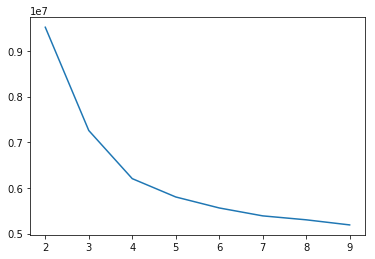

In [183]:
# Would select 3, 4, or 5 clusters
all_kmeans = [i for i in range(8)]
for i in range(8):
    cur_kmeans = KMeans(i+2)
    cur_kmeans.fit(z[:,0:50])
    print("Num clusters", i+2, "Inertia:", cur_kmeans.inertia_)
    all_kmeans[i] = cur_kmeans
plt.plot([i+2 for i in range(8)], [all_kmeans[i].inertia_ for i in range(8)])

10. Hierarchical clustering: Dendrogram in R script

11. MDS on cluster means. Confirms 3 groups, one with 1 cluster and two with 2 clusters each. Accurate representation of distances - one cluster is far away from others, indicating a different type of cell. But T-SNE consistently puts it in the middle of the plot.

In [184]:
# MDS on kmeans cluster means
cmeans = np.zeros((5,X_log.shape[1]))
for c in range(5):
    cmeans[c] = np.mean(X_log[np.where(kmeans.labels_==c)[0]],axis=0)

breaking at iteration 111 with stress 6079.0007818694285
breaking at iteration 64 with stress 6342.5381941856285
breaking at iteration 38 with stress 6342.5182745437105
breaking at iteration 113 with stress 6342.537401859343


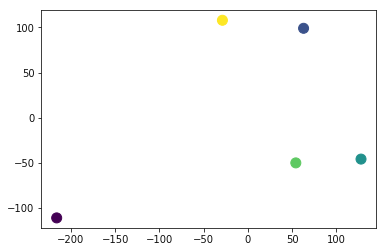

In [185]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(cmeans)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=[0,1,2,3,4],s=100)

In MDS, we see one group with 1 cluster mean and two groups with 2 cluster means each. MDS aim to respresent distances accurately.  The one cluster that far away from the other indicates a different type of cell.

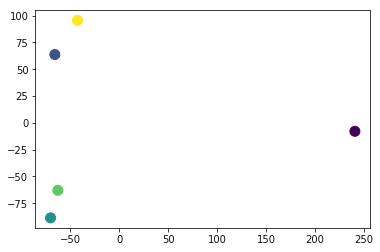

In [186]:
# PCA on cluster means
z_means = PCA(2).fit_transform(cmeans)
plt.scatter(z_means[:,0],z_means[:,1],c=[0,1,2,3,4],s=100)

Similarly, in PCA,  we again see one group with 1 cluster mean and two groups with 2 cluster means each. PCA is a linear projection, hence the distances in the PC directions are preserved.  The one cluster that far away from the other indicates a different type of cell.

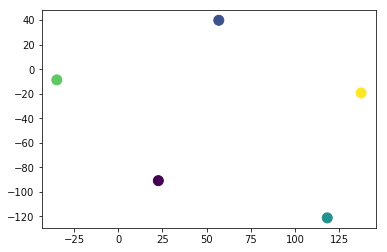

In [187]:
# Emergence of at least 5 clusters. 
z_means_tsne = TSNE(n_components=2,perplexity=40).fit_transform(cmeans)
plt.scatter(z_means_tsne[:,0],z_means_tsne[:,1],c=[0,1,2,3,4],s=100)

T-SNE does not represent distances accurately.  The hierarchical structure of the 5 clusters falling into 3 groups are lost.   (on the other hand, we saw that the 5 clusters are well separated.)

12. PCA/T-SNE on Raw Data

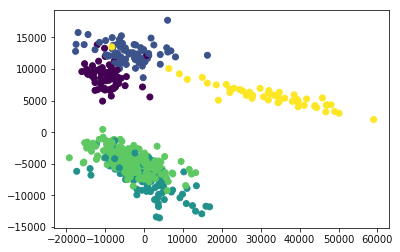

In [188]:
pca = PCA(50).fit(X)
z = pca.transform(X)
plt.scatter(z[:,0],z[:,1],c=y)

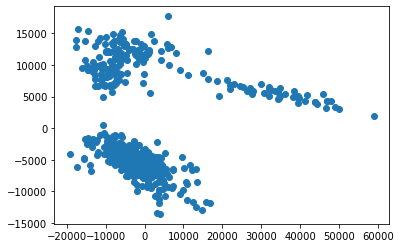

In [60]:
pca = PCA(50).fit(X)
z = pca.transform(X)
plt.scatter(z[:,0],z[:,1])

breaking at iteration 253 with stress 2184710857829.9453


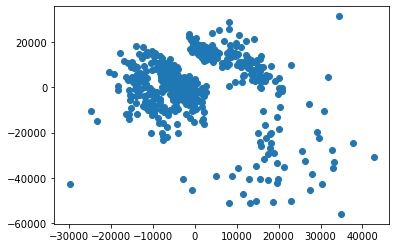

In [61]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(z[:,0:50])
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])

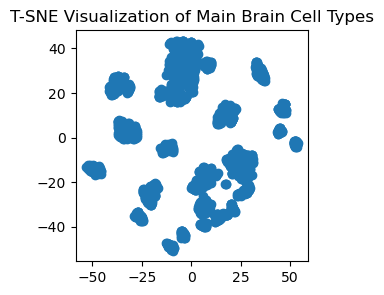

In [30]:
z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(z[:,0:50])
plt.figure(figsize=(3,3))
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title('T-SNE Visualization of Main Brain Cell Types')
plt.show()

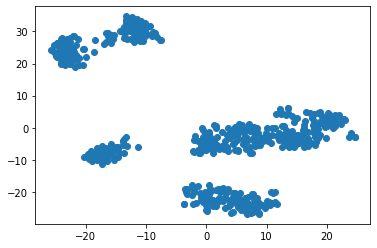

In [63]:
z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(z[:,0:50])
plt.scatter(z_tsne[:,0],z_tsne[:,1])


###### The log transformed data produced more clearly defined clusters. 
###### This typically happens for this type of data.  

In [3]:
## Load Data
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/X.npy")
#y = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/y.npy")

# 511 cells, 45768 genes
print(X.shape)
# Largest entry of first column
np.max(X[:,0])

## Log transform
X_log = np.log2(X + 1)

#Full PCA, raw vs transformed data
#pca = PCA(50).fit(X)
pca_log = PCA(50).fit(X_log)

(2169, 45768)


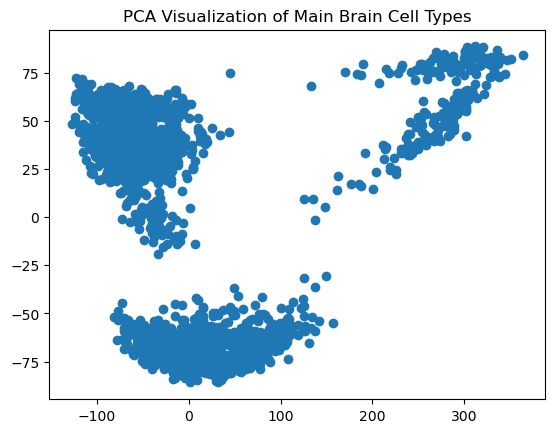

In [7]:
z = pca_log.transform(X_log)
plt.scatter(z[:,0],z[:,1])
plt.title('PCA Visualization of Main Brain Cell Types')
plt.show()

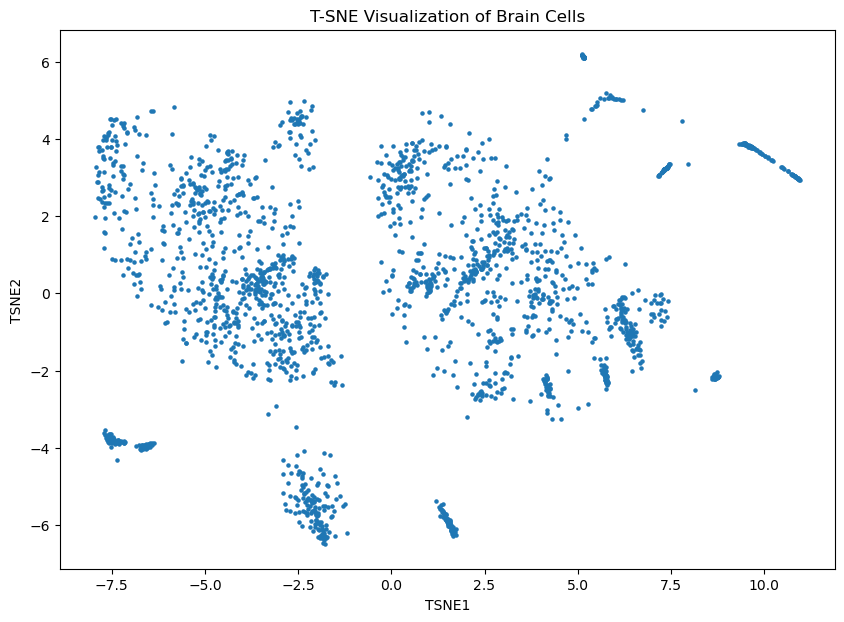

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



# T-SNE reduction to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_log)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
plt.title('T-SNE Visualization of Brain Cells')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()



C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


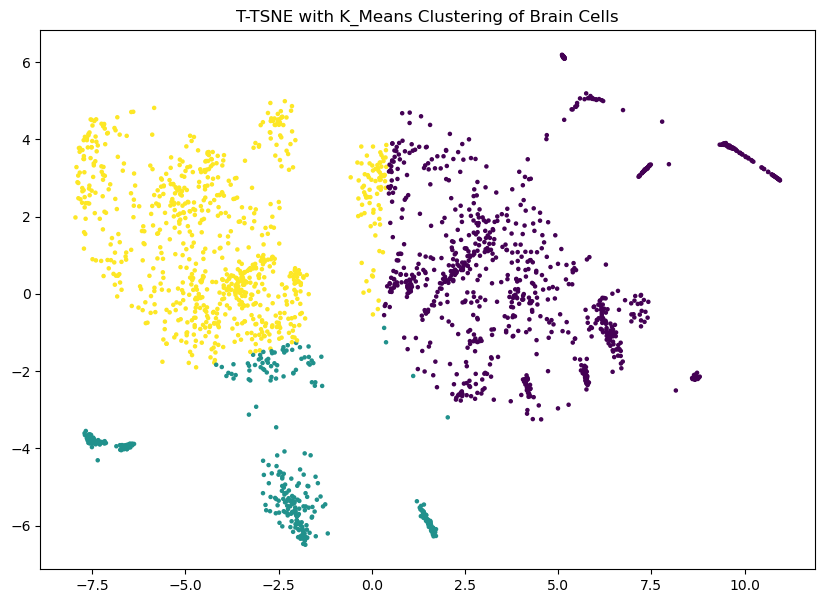

In [55]:
# 聚類分析
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_tsne)

# 可視化
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('T-TSNE with K_Means Clustering of Brain Cells')
#plt.ylabel('TSNE2')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


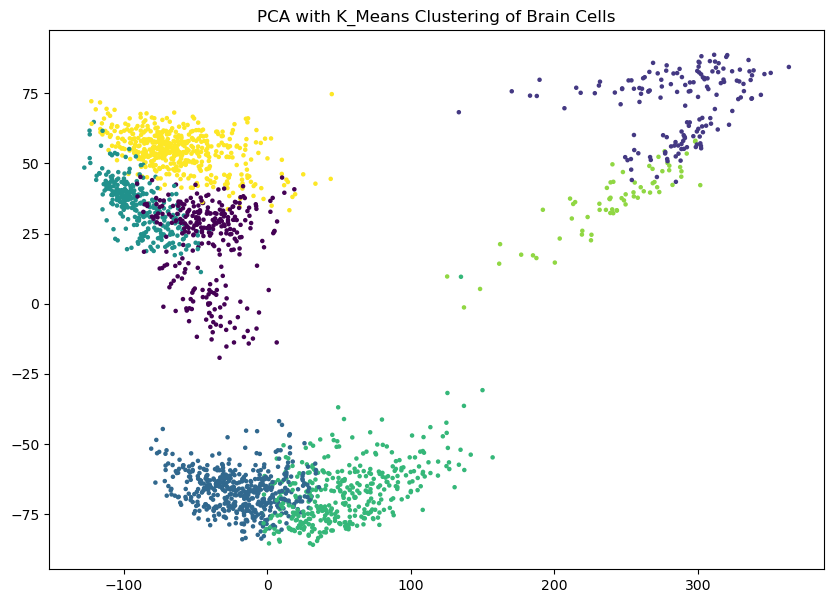

In [49]:
from sklearn.cluster import KMeans

# 聚類分析
kmeans = KMeans(n_clusters=7)
clusters = kmeans.fit_predict(z)

# 可視化
plt.figure(figsize=(10, 7))
plt.scatter(z[:, 0], z[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('PCA with K_Means Clustering of Brain Cells')
#plt.ylabel('TSNE2')
plt.show()

Visualize the Three Main Brain Cell Types: 

Use t-SNE to further reduce dimensionality and visualize the data in 2D, coloring the cells by their main types.

Visualize the Numerous Sub-Types within Each Main Type: 

Use clustering algorithms to identify sub-types within each main type and visualize these clusters.

In [ ]:
## Load Data
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/X.npy")
#y = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/y.npy")

# 511 cells, 45768 genes
print(X.shape)
# Largest entry of first column
np.max(X[:,0])

## Log transform
X_log = np.log2(X + 1)

#Full PCA, raw vs transformed data
pca = PCA().fit(X)
pca_log = PCA().fit(X_log)

# Percentage of variance explained by first component
# print("First component raw:", pca.explained_variance_ratio_[0])
# print("First component log:", pca_log.explained_variance_ratio_[0])


# Cumulative variance explained plots
#plt.plot(range(1, X.shape[0]+1), np.cumsum(pca.explained_variance_ratio_), color="red", label="raw")
#plt.plot(range(1, X.shape[0]+1), np.cumsum(pca_log.explained_variance_ratio_), color="blue", label="log")
#plt.legend()
#plt.show()


## 5. PCA visualization
# Three visually distinct clusters. Could potentially argue for 4 or 5 as well, but these are not well-separated
z = pca_log.transform(X_log)
plt.scatter(z[:,0],z[:,1])

#MDS
#Since there is randomization in the initial state, run this multiple times and use the result with the best objective function value.  (Also be aware that some initializations can give you suboptimal local minima for both MDS and T-SNE algorithms). 
#We still see 3 distinct clusters.  
#mds_class=MDS(n_components=2)
#mds=mds_class.fit_transform(X_log)
#print(mds_class.stress_)
#plt.scatter(mds[:,0],mds[:,1])


#TSNE
# Emergence of at least 5 clusters. 
# Since there is randomization in the initial state, run this multiple times and use the result with the best objective function value.  (Also be aware that some initializations can give you suboptimal local minima for both MDS and T-SNE algorithms).

z_tsne_class = TSNE(n_components=2,perplexity=40)
z_tsne=z_tsne_class.fit_transform(z[:,0:50])
print(z_tsne_class.kl_divergence_)
plt.scatter(z_tsne[:,0],z_tsne[:,1])

#K-Means: From the T-SNE plot (with the lowest KL-divergence), we can see the emergence of 5 clusters.
# K-means with n=5, as decided from T-SNE plot above; 
# Run multiple times and explore settings to get the lowest inertia_, such aa:
# init='random', or random_state=0  
kmeans = KMeans(5, tol=1e-6) 
kmeans.fit(z[:,0:50])
print(kmeans.inertia_)
#PCA plot colored with K-means clusters
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)



# K-means with n=5, as decided from T-SNE plot above; 
# Run multiple times and explore settings to get the lowest inertia_, such aa:
# init='random', or random_state=0  
kmeans = KMeans(5, tol=1e-6) 
kmeans.fit(z[:,0:50])
print(kmeans.inertia_)

#PCA plot colored with K-means clusters
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)


# MDS plot with 5 K-means clusters, on log-transformed data:
mds=mds_class.fit_transform(X_log)
print(mds_class.stress_)
plt.scatter(mds[:,0],mds[:,1],c=kmeans.labels_)

(2169, 45768)


To identify informative genes using an unsupervised approach, we will follow these steps:

1. Cluster the data using K-Means on the p2_unsupervised dataset.
2. Fit a logistic regression model using the cluster labels as pseudo ground truth to identify important features (genes).
3. Select the top features based on logistic regression coefficients.
4. Evaluate the quality of the selected features by training and testing a logistic regression model on the p2_evaluation dataset.

In [ ]:
## Load Data
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/X.npy")
#y = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/y.npy")

In [6]:
## Load Data
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X.npy")
X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/X.npy")
#X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised_reduced/y.npy")


# 511 cells, 45768 genes
print(X.shape)
# Largest entry of first column
np.max(X[:,0])

## Log transform
X_log = np.log2(X + 1)

#Full PCA, raw vs transformed data
pca = PCA().fit(X)
pca_log = PCA().fit(X_log)
z = pca_log.transform(X_log)



(2169, 20000)


In [7]:
# K-means with n=5, as decided from T-SNE plot above; 
# Run multiple times and explore settings to get the lowest inertia_, such aa:
# init='random', or random_state=0  
kmeans = KMeans(5, tol=1e-6) 
kmeans.fit(z[:,0:50])
print(kmeans.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


20514390.679224644


In [8]:
kmeans = KMeans(5, tol=1e-6) 
kmeans.fit(z[:,0:50])
print(kmeans.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


20514032.19601024


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

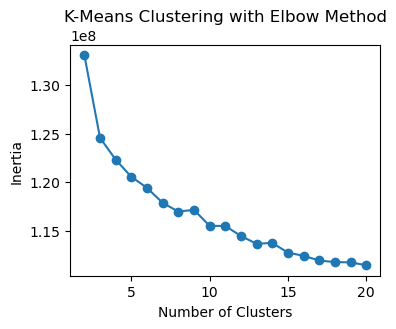

In [9]:
# Use the elbow method to determine the optimal number of clusters
all_kmeans = []
inertia = []
for i in range(2, 21):
    cur_kmeans = KMeans(n_clusters=i, random_state=42)
    cur_kmeans.fit(z)
    inertia.append(cur_kmeans.inertia_)
    all_kmeans.append(cur_kmeans)

# Visualize the elbow method
plt.figure(figsize=(4, 3))
plt.plot(range(2, 21), inertia, marker='o')
plt.title('K-Means Clustering with Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('Elbow Method.png')
plt.show()

In [ ]:
# We have already determined the optimal number of clusters using the elbow method
optimal_clusters = 4  # This value should be chosen based on the elbow plot

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(z)

from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model using the pseudo labels
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')
log_reg.fit(X_log, pseudo_labels)

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_



In [ ]:
coefficients

In [ ]:
# Select top N features
N = 100  # Adjust based on the desired number of features
top_features_indices = np.argsort(np.abs(coefficients).max(axis=0))[-N:]

# Optionally, print the indices of the top features
print("Indices of top features selected:")
print(top_features_indices)


In [10]:
# We have already determined the optimal number of clusters using the elbow method
optimal_clusters = 4  # This value should be chosen based on the elbow plot

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(z)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data (replace 'path_to_your_data' with actual paths)
#X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X.npy")
#X = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_unsupervised/X.npy")
p2_unsupervised_train_data = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X_train.npy")
p2_unsupervised_test_data = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/y_train.npy")
p2_evaluation_train_data = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X_test.npy")
p2_evaluation_test_data = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/y_test.npy")

# Assume the data is structured with features in columns and samples in rows
# Assume the target variable is in the last column
X_unsupervised = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X_train.npy")
y_unsupervised = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/y_train.npy")

X_evaluation_train = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/X_test.npy")
y_evaluation_train = np.load("C:/Users/user/Desktop/Statistics/release_gene_analysis_data/data/p2_evaluation_reduced/y_test.npy")

X_evaluation_test = p2_evaluation_train_data
y_evaluation_test = p2_evaluation_test_data

# Standardize the data
scaler = StandardScaler()
X_unsupervised = scaler.fit_transform(X_unsupervised)
X_evaluation_train = scaler.transform(X_evaluation_train)
X_evaluation_test = scaler.transform(X_evaluation_test)

# Train logistic regression on p2_unsupervised data
logreg = LogisticRegressionCV(cv=5, solver='liblinear', multi_class='ovr')
logreg.fit(X_unsupervised, y_unsupervised)

# Get the absolute values of the coefficients and rank features
coef_abs = np.abs(logreg.coef_).sum(axis=0)
top_100_features_indices = np.argsort(coef_abs)[-100:]

# Select these features in the evaluation data
X_evaluation_train_top_100 = X_evaluation_train[:, top_100_features_indices]
X_evaluation_test_top_100 = X_evaluation_test[:, top_100_features_indices]

# Log transform
X_evaluation_train_top_100 = np.log2(X_evaluation_train_top_100 + 1)
X_evaluation_test_top_100 = np.log2(X_evaluation_test_top_100 + 1)

# Train and test logistic regression classifier on selected features
logreg.fit(X_evaluation_train_top_100, y_evaluation_train)
score = logreg.score(X_evaluation_test_top_100, y_evaluation_test)
print(f'Top 100 features score: {score}')

# Random features baseline
random_indices = np.random.choice(X_evaluation_train.shape[1], 100, replace=False)
X_evaluation_train_random_100 = X_evaluation_train[:, random_indices]
X_evaluation_test_random_100 = X_evaluation_test[:, random_indices]

X_evaluation_train_random_100 = np.log2(X_evaluation_train_random_100 + 1)
X_evaluation_test_random_100 = np.log2(X_evaluation_test_random_100 + 1)

logreg.fit(X_evaluation_train_random_100, y_evaluation_train)
random_score = logreg.score(X_evaluation_test_random_100, y_evaluation_test)
print(f'Random 100 features score: {random_score}')

# High-variance features baseline
variances = np.var(X_evaluation_train, axis=0)
high_variance_indices = np.argsort(variances)[-100:]

X_evaluation_train_high_variance_100 = X_evaluation_train[:, high_variance_indices]
X_evaluation_test_high_variance_100 = X_evaluation_test[:, high_variance_indices]

X_evaluation_train_high_variance_100 = np.log2(X_evaluation_train_high_variance_100 + 1)
X_evaluation_test_high_variance_100 = np.log2(X_evaluation_test_high_variance_100 + 1)

logreg.fit(X_evaluation_train_high_variance_100, y_evaluation_train)
high_variance_score = logreg.score(X_evaluation_test_high_variance_100, y_evaluation_test)
print(f'High variance 100 features score: {high_variance_score}')

# Variance comparison histograms
top_100_variances = np.var(X_evaluation_train_top_100, axis=0)
high_variance_100_variances = np.var(X_evaluation_train_high_variance_100, axis=0)

plt.hist(top_100_variances, alpha=0.5, label='Top 100 Features')
plt.hist(high_variance_100_variances, alpha=0.5, label='High Variance Features')
plt.legend(loc='upper right')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Variance Comparison')
plt.show()



KeyboardInterrupt: 